In [1]:
import pandas as pd

# PM4Py

In [2]:
import pm4py

In [3]:
dataframe = pd.read_csv("../data/running-example.csv", sep=';')
dataframe["Timestamp"] = pd.to_datetime(dataframe["Timestamp"], format="%d-%m-%Y:%H.%M")
dataframe = pm4py.format_dataframe(dataframe, case_id='Case ID', activity_key='Activity', timestamp_key='Timestamp')
event_log = pm4py.convert_to_event_log(dataframe)

c:\Users\Legion5\AppData\Local\Programs\Python\Python38\lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:180: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
c:\Users\Legion5\AppData\Local\Programs\Python\Python38\lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:180: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
c:\Users\Legion5\AppData\Local\Programs\Python\Python38\lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:180: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a f

# Try out structure

In [4]:
petri, im, fm = pm4py.discover_petri_net_alpha(event_log)

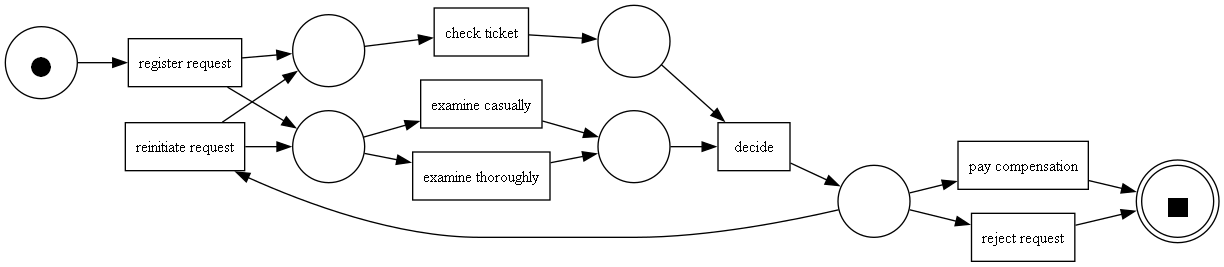

In [5]:
pm4py.view_petri_net(petri, im, fm)

In [6]:
print(list(petri.places)[0].name)
list(list(petri.places)[0].out_arcs)[0].target

({'examine thoroughly', 'examine casually'}, {'decide'})


(decide, 'decide')

In [7]:
[str(x) for x in list(petri.places)]

["({'examine thoroughly', 'examine casually'}, {'decide'})",
 "({'check ticket'}, {'decide'})",
 'end',
 "({'register request', 'reinitiate request'}, {'examine thoroughly', 'examine casually'})",
 'start',
 "({'register request', 'reinitiate request'}, {'check ticket'})",
 "({'decide'}, {'pay compensation', 'reject request', 'reinitiate request'})"]

In [8]:
import re
myPlaces = list(petri.places)
myPlaces = [re.findall("{(?:\'[^\']+\'(?:,\s)?)*}", str(x)) for x in myPlaces]
myPlaces = [re.sub(", ",",", re.sub("['\{\}\[\]]", "", str(x))).split("\",\"") for x in myPlaces]




In [9]:
newPlaces = []

for i in range(0, len(myPlaces)):
    myPlaces[i] = [x.replace("\"", "") for x in myPlaces[i]]
    if list(petri.places)[i].name not in ["start", "end"]:
        newPlaces.append({
            "name": list(petri.places)[i].name,
            "in": myPlaces[i][0].split(","),
            "out": myPlaces[i][1].split(",")
        })
    
newPlaces

[{'name': "({'examine thoroughly', 'examine casually'}, {'decide'})",
  'in': ['examine thoroughly', 'examine casually'],
  'out': ['decide']},
 {'name': "({'check ticket'}, {'decide'})",
  'in': ['check ticket'],
  'out': ['decide']},
 {'name': "({'register request', 'reinitiate request'}, {'examine thoroughly', 'examine casually'})",
  'in': ['register request', 'reinitiate request'],
  'out': ['examine thoroughly', 'examine casually']},
 {'name': "({'register request', 'reinitiate request'}, {'check ticket'})",
  'in': ['register request', 'reinitiate request'],
  'out': ['check ticket']},
 {'name': "({'decide'}, {'pay compensation', 'reject request', 'reinitiate request'})",
  'in': ['decide'],
  'out': ['pay compensation', 'reject request', 'reinitiate request']}]

In [10]:
petri.places

{({'check ticket'}, {'decide'}),
 ({'decide'}, {'pay compensation', 'reject request', 'reinitiate request'}),
 ({'examine thoroughly', 'examine casually'}, {'decide'}),
 ({'register request', 'reinitiate request'}, {'check ticket'}),
 ({'register request', 'reinitiate request'}, {'examine thoroughly', 'examine casually'}),
 end,
 start}

In [11]:
myArcs = list(petri.arcs)
myArcs

[(register request, 'register request')->({'register request', 'reinitiate request'}, {'examine thoroughly', 'examine casually'}),
 ({'register request', 'reinitiate request'}, {'examine thoroughly', 'examine casually'})->(examine casually, 'examine casually'),
 (check ticket, 'check ticket')->({'check ticket'}, {'decide'}),
 (reinitiate request, 'reinitiate request')->({'register request', 'reinitiate request'}, {'check ticket'}),
 ({'examine thoroughly', 'examine casually'}, {'decide'})->(decide, 'decide'),
 start->(register request, 'register request'),
 ({'register request', 'reinitiate request'}, {'examine thoroughly', 'examine casually'})->(examine thoroughly, 'examine thoroughly'),
 (pay compensation, 'pay compensation')->end,
 (examine thoroughly, 'examine thoroughly')->({'examine thoroughly', 'examine casually'}, {'decide'}),
 ({'decide'}, {'pay compensation', 'reject request', 'reinitiate request'})->(pay compensation, 'pay compensation'),
 (register request, 'register reques

In [12]:
arcs = [{"source": str(x).split("->")[0], "dest": str(x).split("->")[1]} for x in petri.arcs]
arcs

[{'source': "(register request, 'register request')",
  'dest': "({'register request', 'reinitiate request'}, {'examine thoroughly', 'examine casually'})"},
 {'source': "({'register request', 'reinitiate request'}, {'examine thoroughly', 'examine casually'})",
  'dest': "(examine casually, 'examine casually')"},
 {'source': "(check ticket, 'check ticket')",
  'dest': "({'check ticket'}, {'decide'})"},
 {'source': "(reinitiate request, 'reinitiate request')",
  'dest': "({'register request', 'reinitiate request'}, {'check ticket'})"},
 {'source': "({'examine thoroughly', 'examine casually'}, {'decide'})",
  'dest': "(decide, 'decide')"},
 {'source': 'start', 'dest': "(register request, 'register request')"},
 {'source': "({'register request', 'reinitiate request'}, {'examine thoroughly', 'examine casually'})",
  'dest': "(examine thoroughly, 'examine thoroughly')"},
 {'source': "(pay compensation, 'pay compensation')", 'dest': 'end'},
 {'source': "(examine thoroughly, 'examine thoroughl

In [13]:
placesDict = dict()
for place in petri.places:
    placesDict[str(place)] = {
        "pm4py_object": place,
        "gui_object": None,
        "tokens": dict(im)[place] if place in dict(im).keys() else 0
    }


transDict = dict()
for trans in petri.transitions:
    transDict[str(trans)] = {
        "pm4py_object": trans,
        "gui_object": None,
    }

In [14]:
import gui
gui.App(placesDict, transDict, arcs)


In [15]:
petri.Place

pm4py.objects.petri_net.obj.PetriNet.Place

## Liste an Start/End Aktivitäten

In [16]:
pm4py.get_start_activities(event_log)

{'register request': 6}

In [17]:
sorted(pm4py.get_end_activities(event_log).items(), key=lambda x:x[1], reverse=True)

[('reject request', 3), ('pay compensation', 3)]

## Anzahl an Activities welche öfters in einem Case vorkommen

In [18]:
pm4py.get_rework_cases_per_activity(event_log)

{'check ticket': 2,
 'decide': 2,
 'examine casually': 1,
 'reinitiate request': 1}

# Lambda based filtering

## Wie viele Fälle haben mehr als 15 Aktivitäten?

In [19]:
len(pm4py.filter_case_size(event_log, 16, 9999))

0

## Wie oft kommt die Aktivität 'check_ticket' im Event 'A277' vor?

In [20]:
case_a277 = pm4py.filter_log(lambda x: x.attributes["concept:name"] == "A277", event_log)
len(case_a277[0])

C:\Users\Legion5\AppData\Local\Temp\ipykernel_20108\2184375474.py:1: DeprecatedWarning: filter_log is deprecated as of 2.3.0 and will be removed in 3.0.0. the EventLog class will be removed in a future release.
  case_a277 = pm4py.filter_log(lambda x: x.attributes["concept:name"] == "A277", event_log)


IndexError: list index out of range

In [ ]:
len(pm4py.filter_trace(lambda x: x['concept:name'] in {'Payment'}, case_a277[0]))

c:\Users\Dani\AppData\Local\Programs\Python\Python310\lib\site-packages\pm4py\utils.py:508: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


2

# Wie lang ist der längste/kürzeste Case?

In [ ]:
len(event_log[2])  # len of third case

5

In [ ]:
len(pm4py.sort_log(event_log, lambda t: len(t))[0])  # shortest case

C:\Users\Dani\AppData\Local\Temp\ipykernel_12708\1202531181.py:1: DeprecatedWarning: sort_log is deprecated as of 2.3.0 and will be removed in 3.0.0. the EventLog class will be removed in a future release.
  len(pm4py.sort_log(event_log, lambda t: len(t))[0])  # shortest case


2

In [ ]:
len(pm4py.sort_log(event_log, lambda t: len(t), reverse=True)[0])  # longest case

C:\Users\Dani\AppData\Local\Temp\ipykernel_12708\747499805.py:1: DeprecatedWarning: sort_log is deprecated as of 2.3.0 and will be removed in 3.0.0. the EventLog class will be removed in a future release.
  len(pm4py.sort_log(event_log, lambda t: len(t), reverse=True)[0])  # longest case


20

# Petri nets

## Erstellung Petrinetze

In [ ]:
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz/bin"

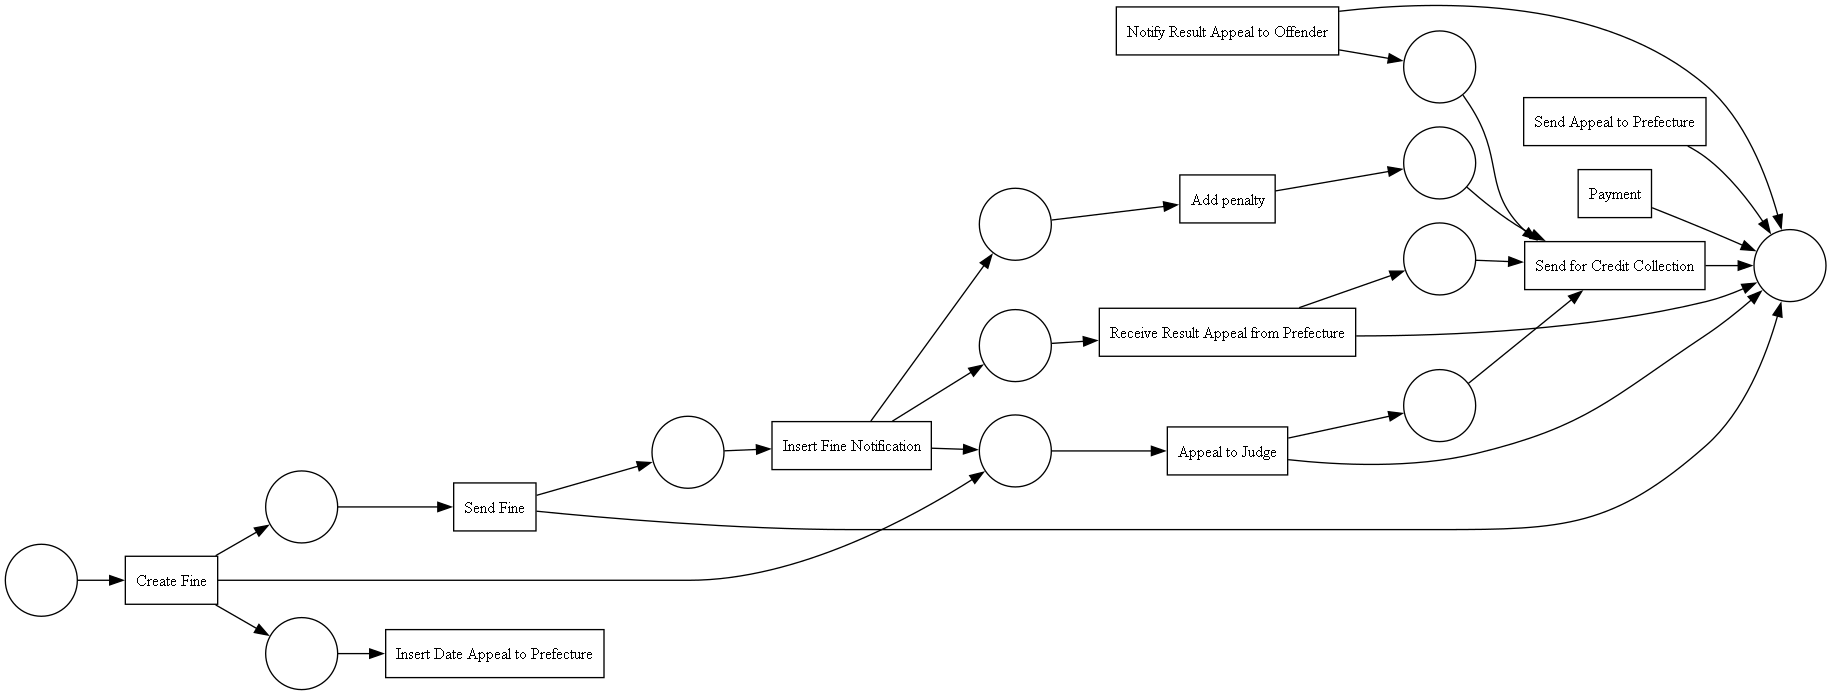

In [ ]:
petrinet_alpha, initial_markings, final_markings = pm4py.discover_petri_net_alpha(dataframe)
pm4py.view_petri_net(petrinet_alpha)

C:\Users\Dani\AppData\Local\Temp\ipykernel_12708\1414685126.py:1: DeprecatedWarning: discover_petri_net_alpha_plus is deprecated as of 2.3.0 and will be removed in 3.0.0. this method will be removed in a future release.
  petrinet_alpha_plus, _, _ = pm4py.discover_petri_net_alpha_plus(dataframe)


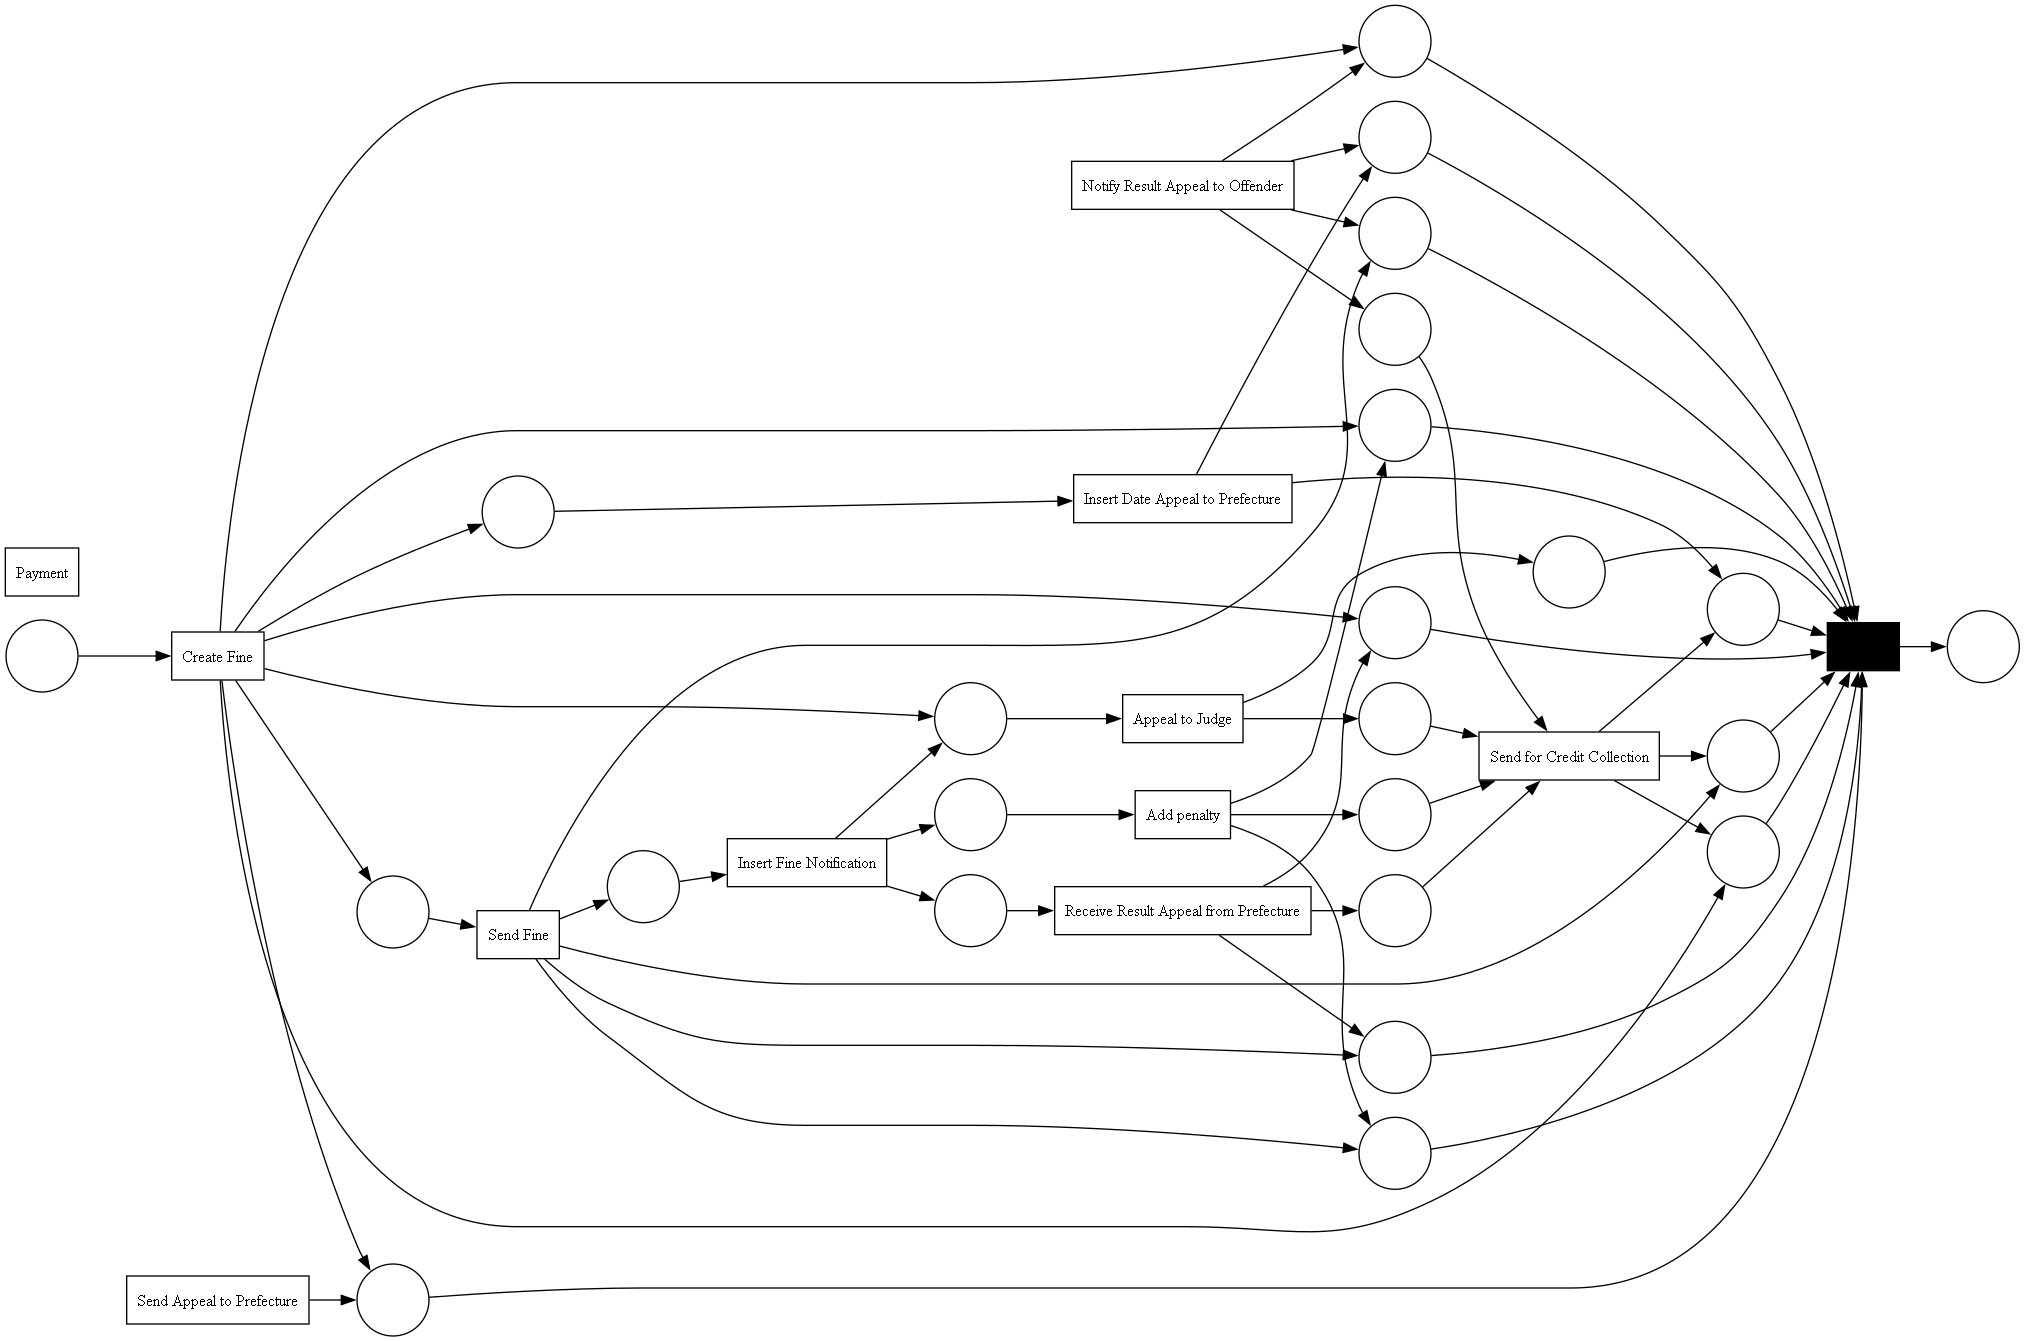

In [ ]:
petrinet_alpha_plus, _, _ = pm4py.discover_petri_net_alpha_plus(dataframe)
pm4py.view_petri_net(petrinet_alpha_plus)

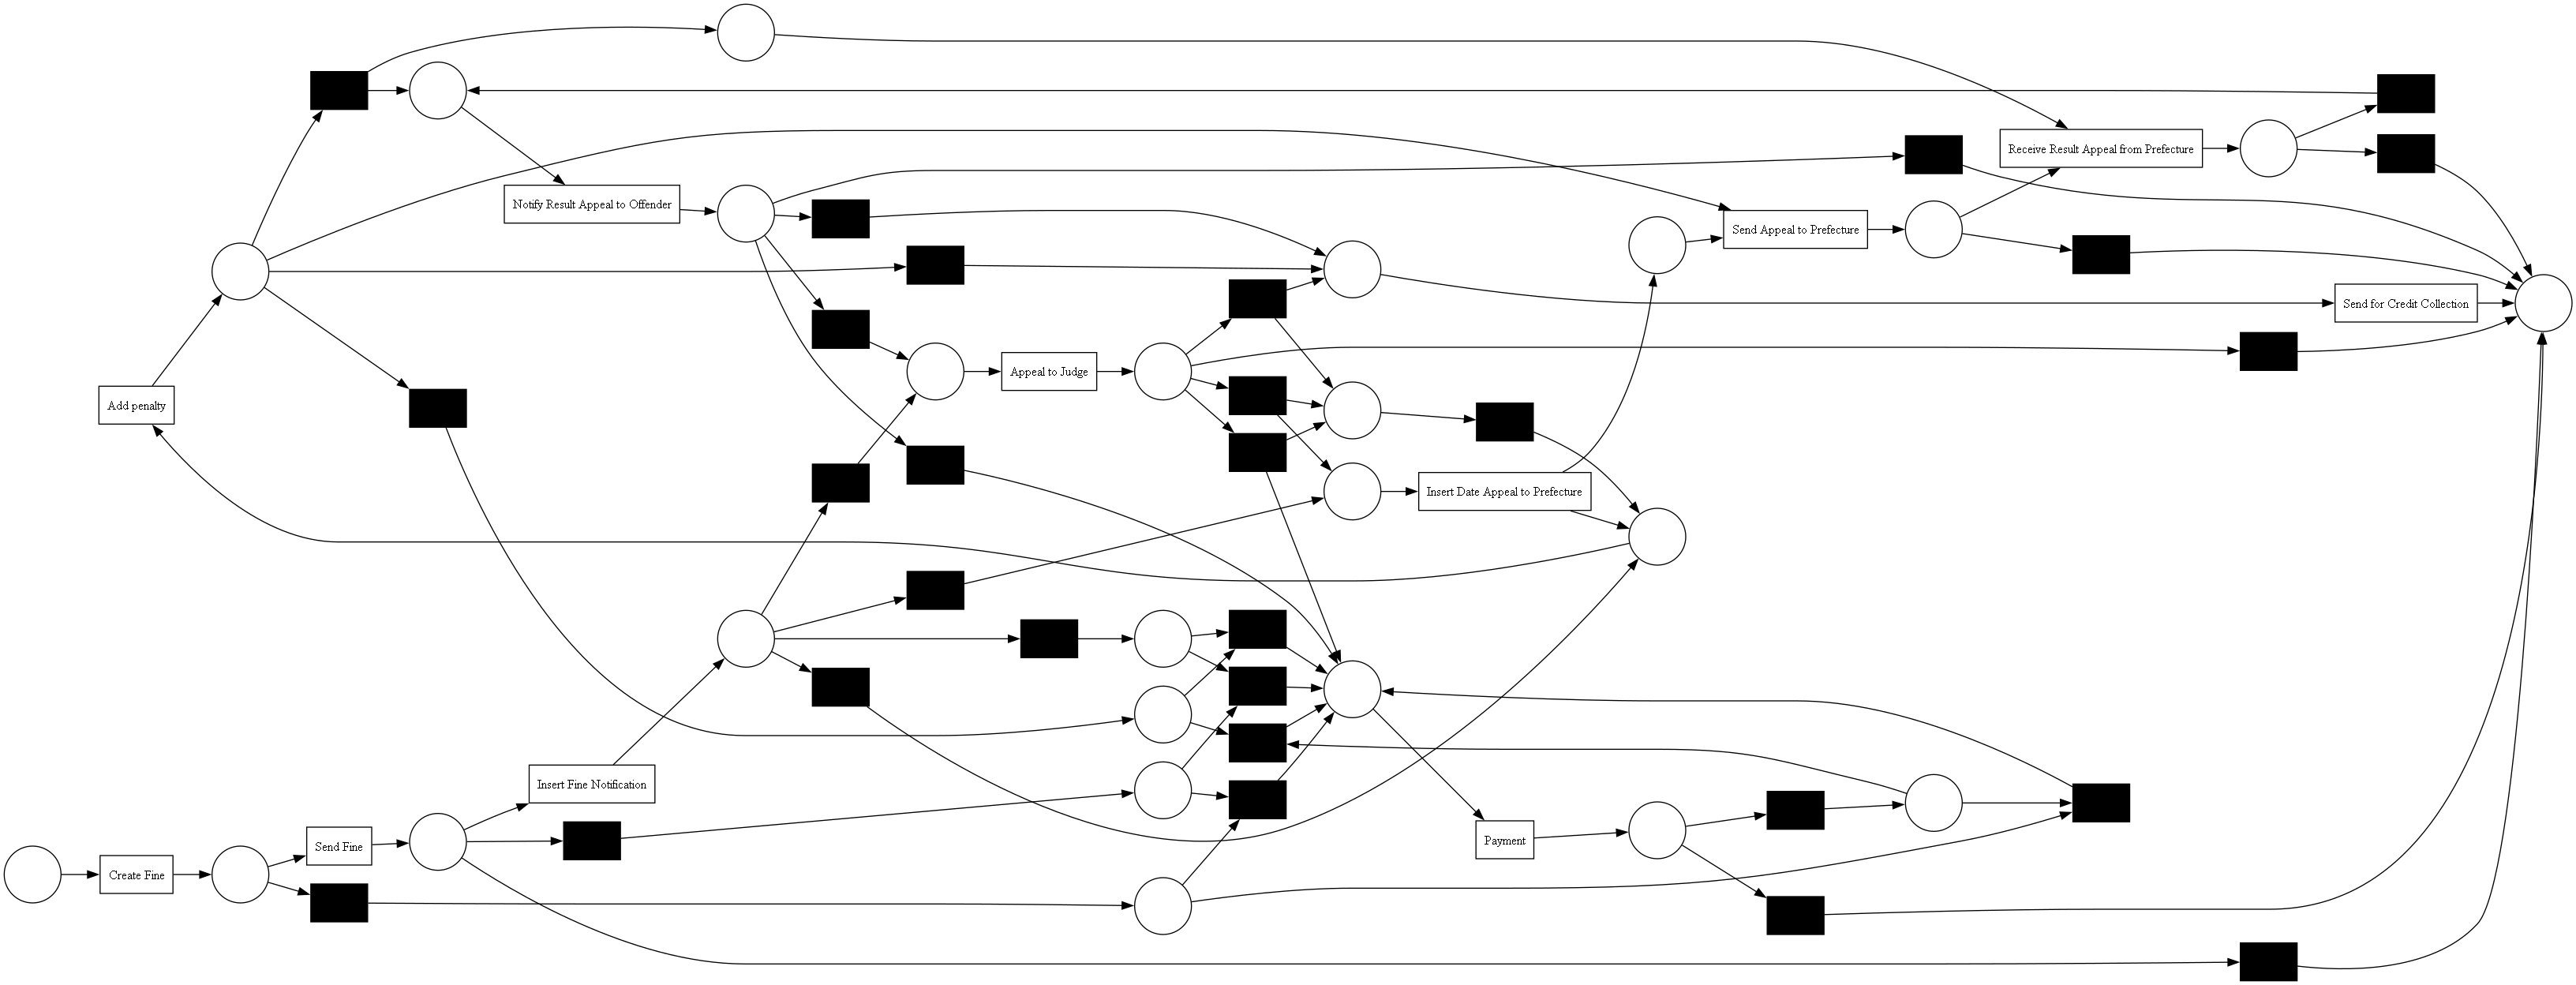

In [ ]:
petrinet_heuristics, _, _ = pm4py.discover_petri_net_heuristics(dataframe)
pm4py.view_petri_net(petrinet_heuristics)

discovering Petri net using ILP miner, completed causal relations ::   0%|          | 0/21 [00:00<?, ?it/s]

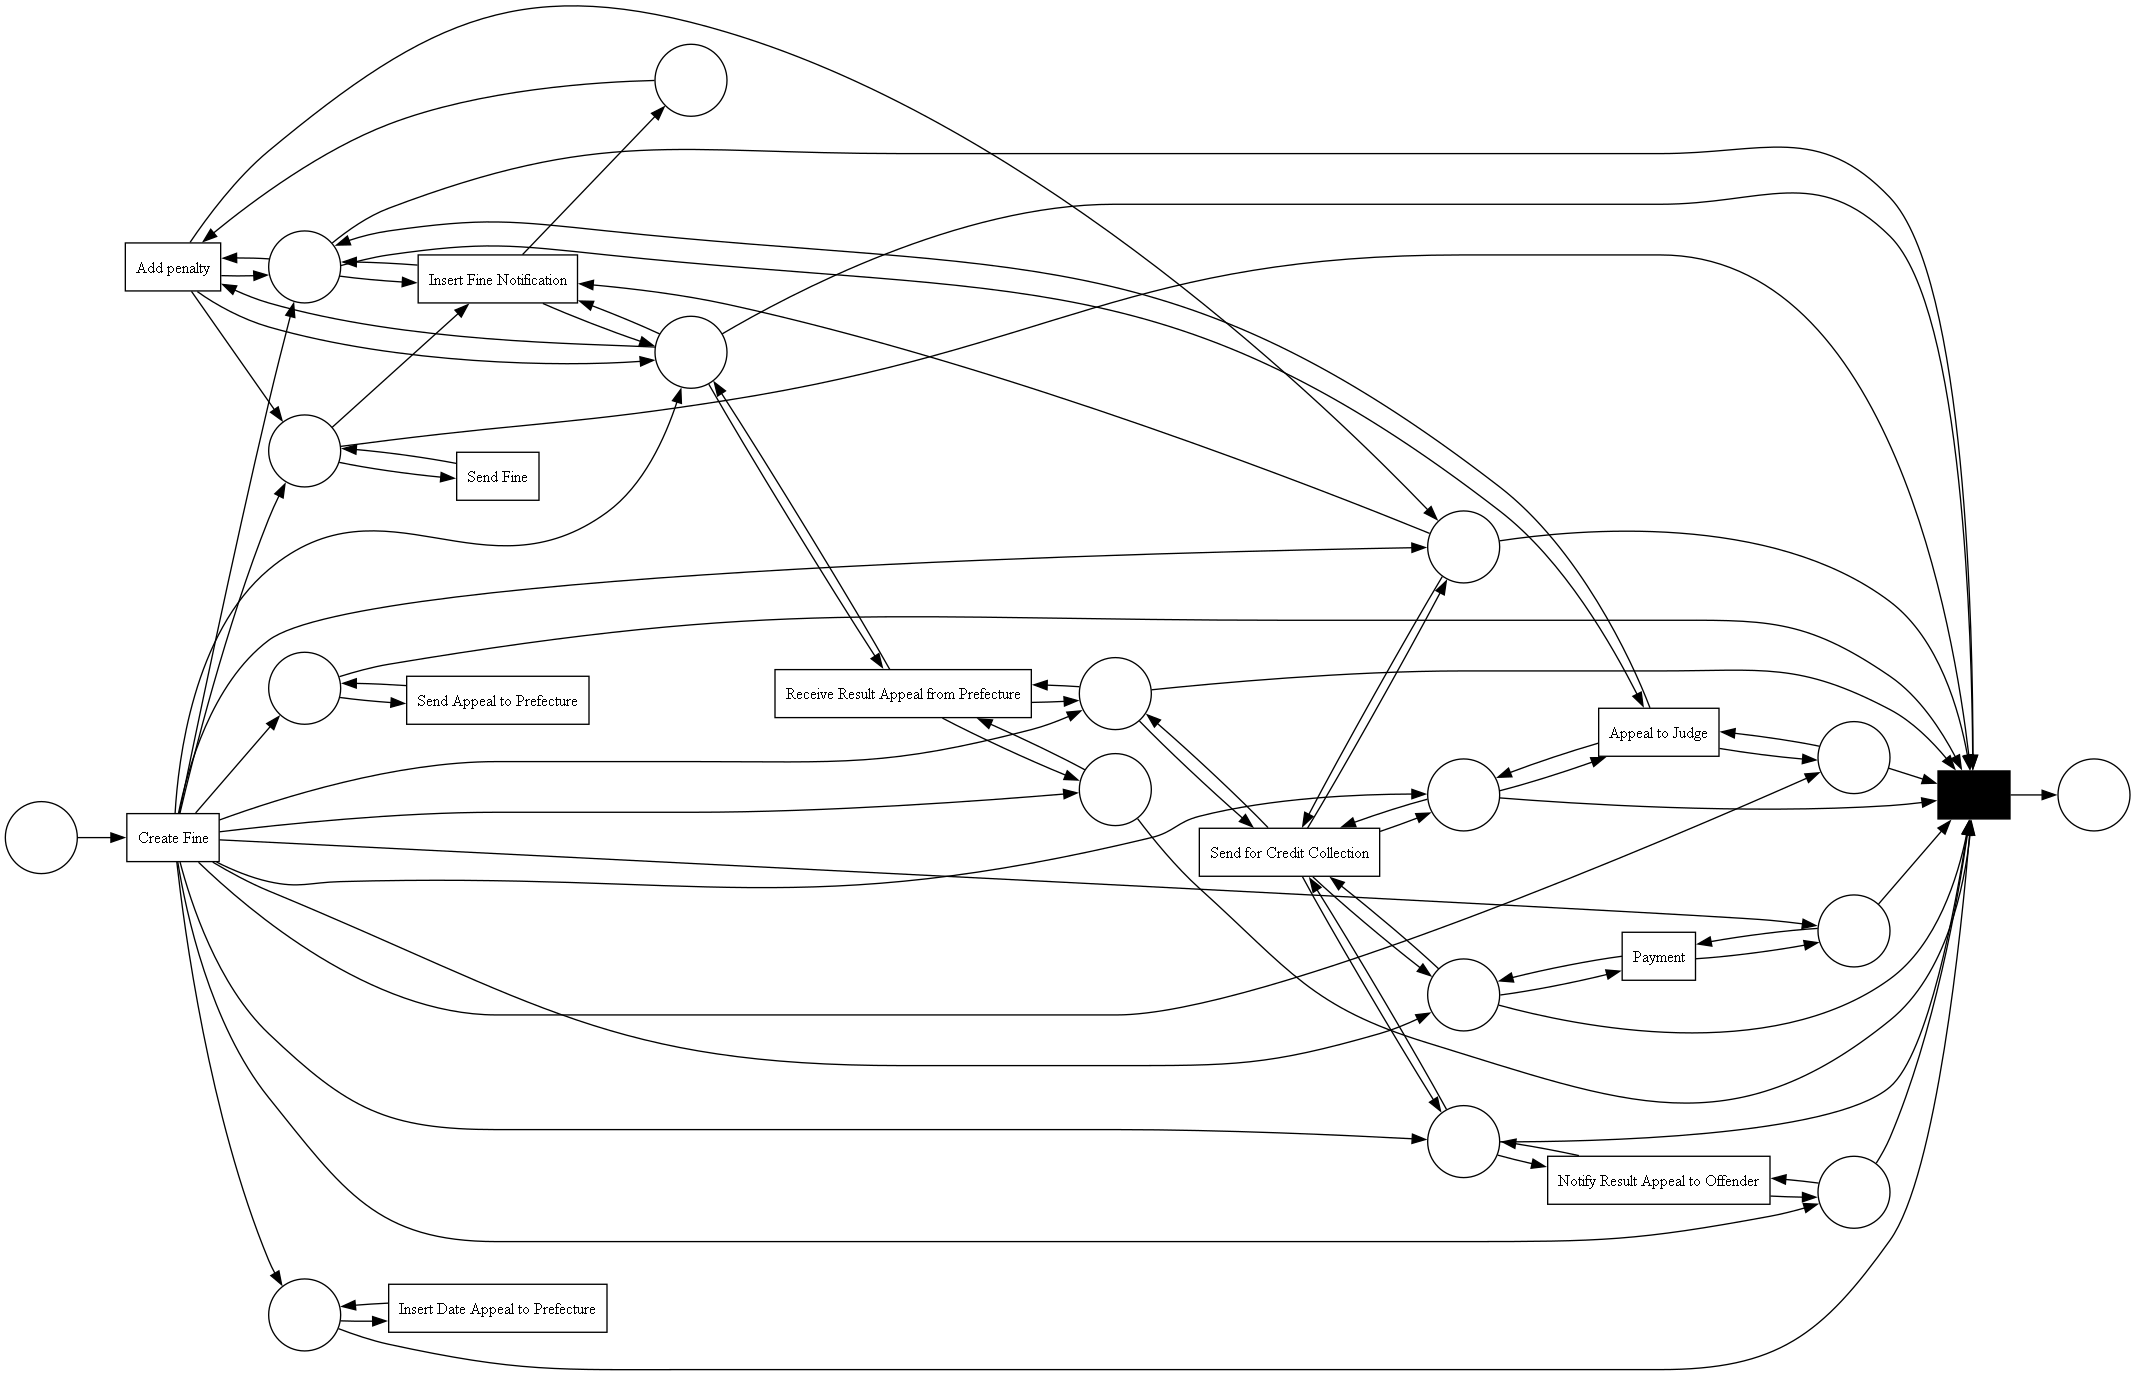

In [ ]:
petrinet_ilp, _, _ = pm4py.discover_petri_net_ilp(dataframe)
pm4py.view_petri_net(petrinet_ilp)

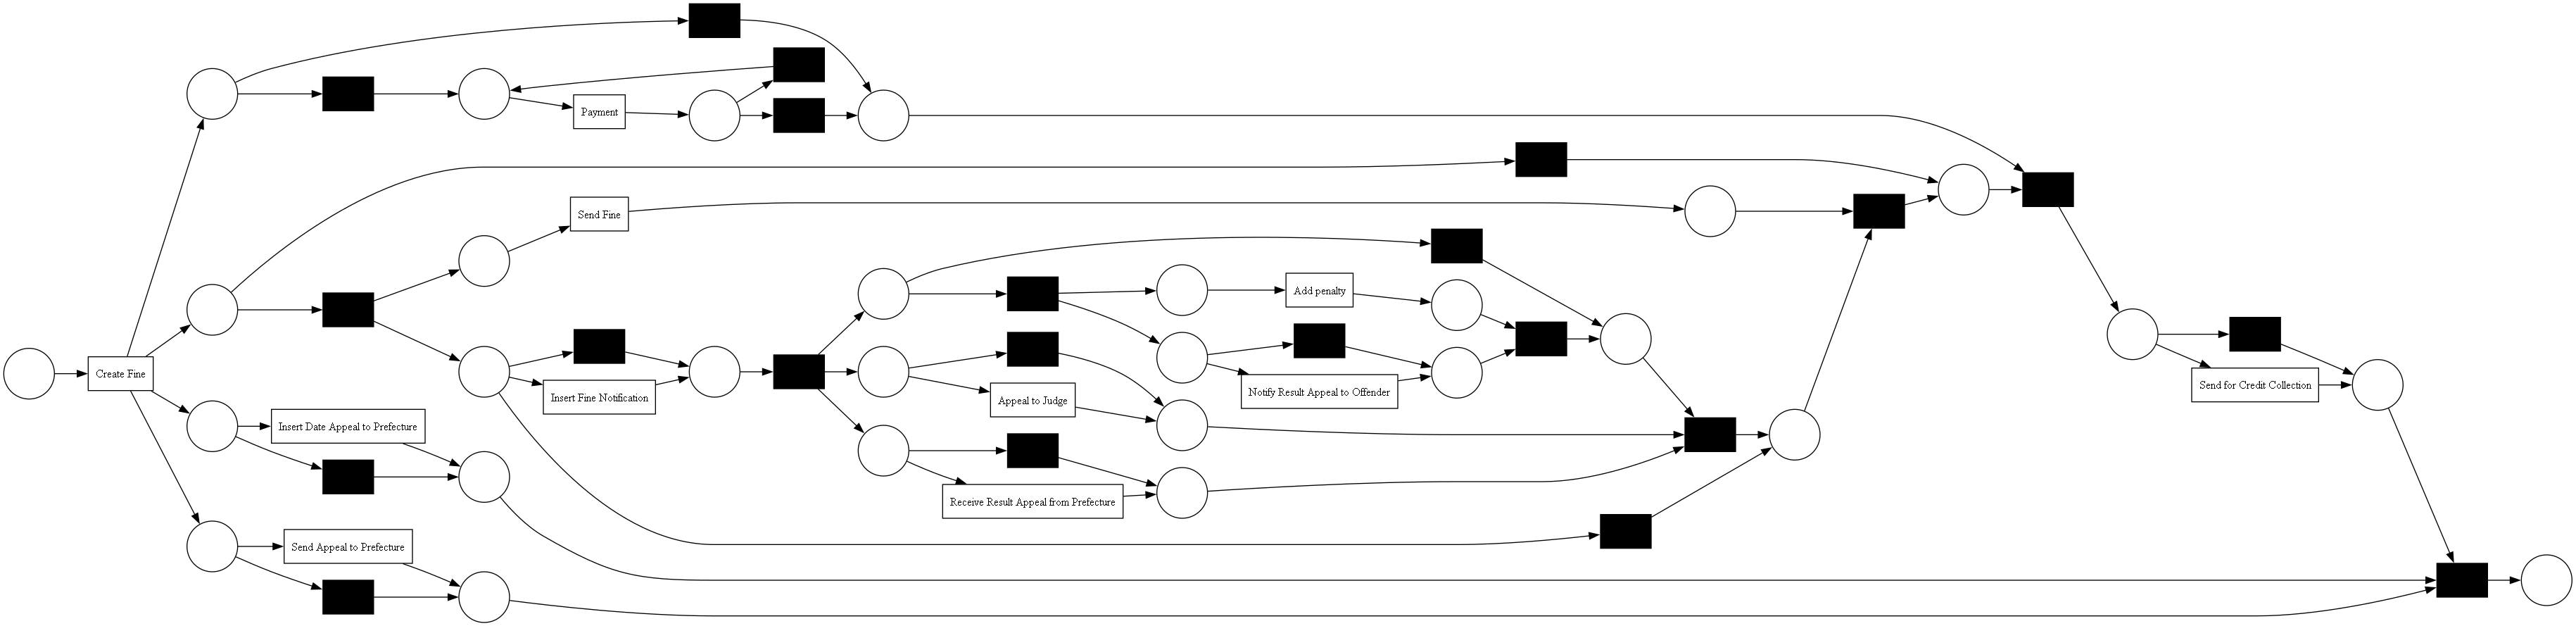

In [ ]:
petrinet_inductive, _, _ = pm4py.discover_petri_net_inductive(dataframe)
pm4py.view_petri_net(petrinet_inductive)

## Einfärben

In [ ]:
def getDeco(petrinet, initial_marking, final_marking, colorArc=False):
    deco = {}
    for pl in petrinet.places:
        if pl in initial_marking:
            deco[pl] = {'color': 'green', 'label': ''}
        if pl in final_marking:
            deco[pl] = {'color': 'orange', 'label': ''}
    if colorArc:
        for arc in petrinet.arcs:
            deco[arc] = {'color': 'red', 'label': 'aa', 'penwidth': '5'}
    return deco

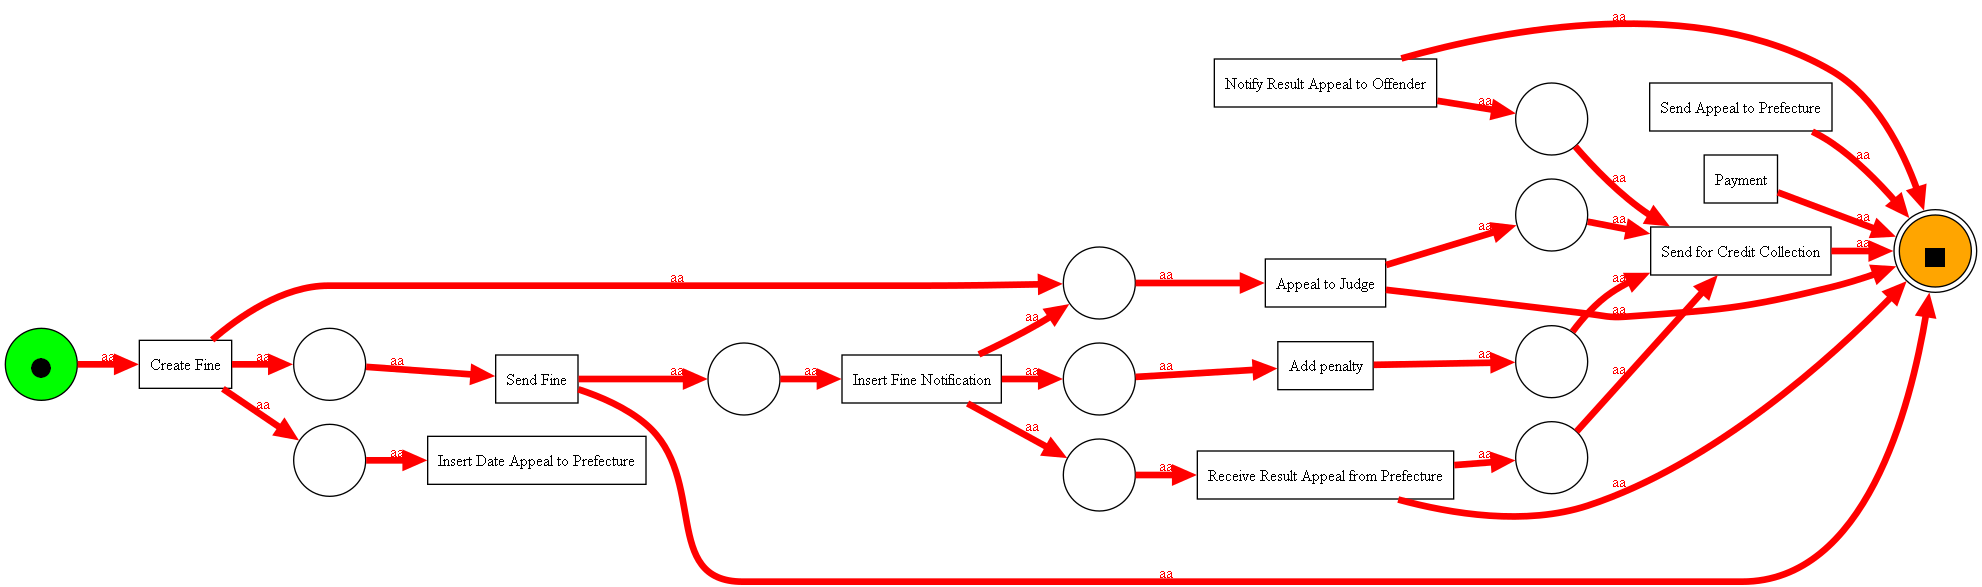

In [ ]:
pm4py.view_petri_net(petrinet_alpha, initial_markings, final_markings, decorations=getDeco(petrinet_alpha, initial_markings, final_markings, True))

## Conformance checking

https://pm4py.fit.fraunhofer.de/static/assets/api/2.7.8/api.html#conformance-checking-pm4py-conformance

### Creating bad log

In [ ]:
shorter_log = pm4py.filter_log(lambda x: x.attributes["concept:name"] in ("A277", "A1", "A10000", "A10001"), event_log)

C:\Users\Dani\AppData\Local\Temp\ipykernel_12708\928922855.py:1: DeprecatedWarning: filter_log is deprecated as of 2.3.0 and will be removed in 3.0.0. the EventLog class will be removed in a future release.
  shorter_log = pm4py.filter_log(lambda x: x.attributes["concept:name"] in ("A277", "A1", "A10000", "A10001"), event_log)


In [ ]:
shorter_log

[{'attributes': {'concept:name': 'A1'}, 'events': [{'Unnamed: 0': 0, 'amount': 35.0, 'org:resource': 561.0, 'dismissal': 'NIL', 'concept:name': 'Create Fine', 'vehicleClass': 'A', 'totalPaymentAmount': 0.0, 'lifecycle:transition': 'complete', 'time:timestamp': Timestamp('2006-07-23 22:00:00+0000', tz='UTC'), 'article': 157.0, 'points': 0.0, 'expense': nan, 'notificationType': nan, 'lastSent': nan, 'paymentAmount': nan, 'matricola': nan, '@@index': 0, '@@case_index': 0}, '..', {'Unnamed: 0': 1, 'amount': nan, 'org:resource': nan, 'dismissal': nan, 'concept:name': 'Send Fine', 'vehicleClass': nan, 'totalPaymentAmount': nan, 'lifecycle:transition': 'complete', 'time:timestamp': Timestamp('2006-12-04 23:00:00+0000', tz='UTC'), 'article': nan, 'points': nan, 'expense': 11.0, 'notificationType': nan, 'lastSent': nan, 'paymentAmount': nan, 'matricola': nan, '@@index': 1, '@@case_index': 0}]}, '....', {'attributes': {'concept:name': 'A277'}, 'events': [{'Unnamed: 0': 36864, 'amount': 35.0, 'or

In [ ]:
type(shorter_log)

pm4py.objects.log.obj.EventLog

In [ ]:
dataframe_shorter_log = pm4py.convert_to_dataframe(shorter_log)
# dataframe_shorter_log.to_csv('road_traffic_fine_shortened.csv', index=False)

Deleted: 
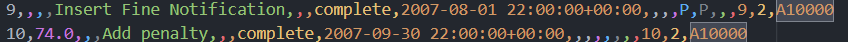

In [ ]:
dataframe_conformance_checking = pd.read_csv("road_traffic_fine_shortened.csv", sep=',')
dataframe_conformance_checking = pm4py.format_dataframe(dataframe_conformance_checking, case_id='case:concept:name', activity_key='concept:name', timestamp_key='time:timestamp')
event_log_conformance_checking = pm4py.convert_to_event_log(dataframe_conformance_checking)

c:\Users\Dani\AppData\Local\Programs\Python\Python310\lib\site-packages\pm4py\utils.py:508: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


### Creation of petri net to use

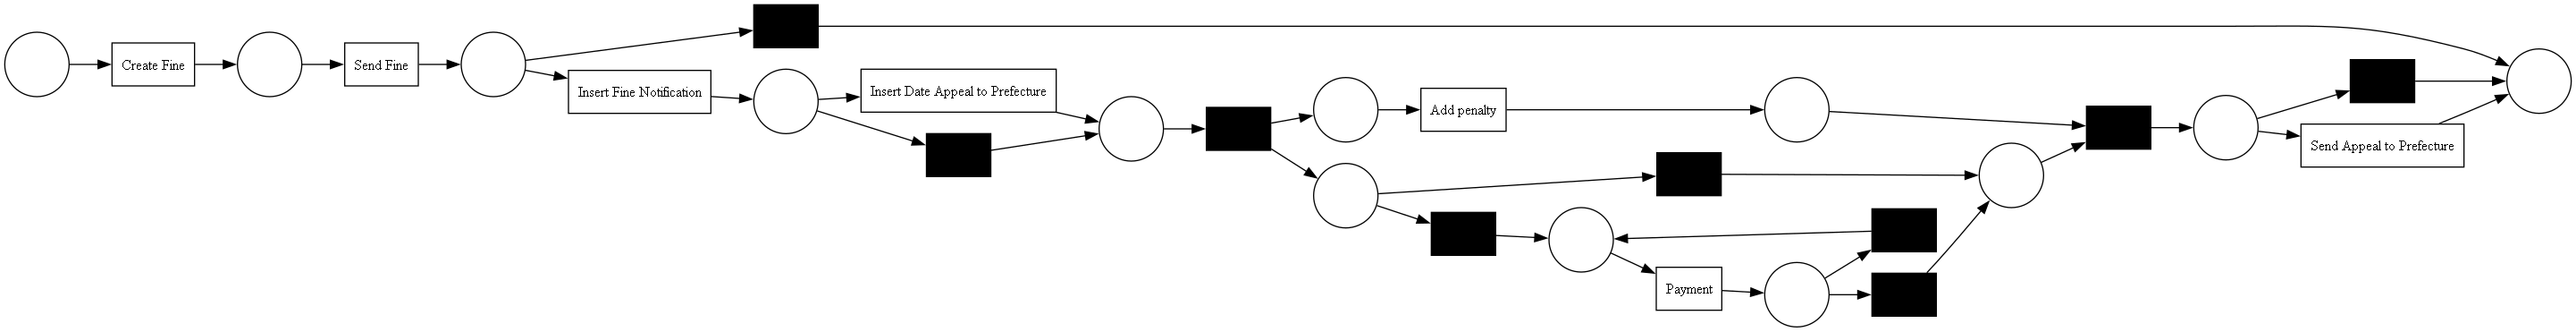

In [ ]:
petrinet_conformance_alpha, initial_markings_conformance, final_markings_conformance = pm4py.discover_petri_net_inductive(dataframe_shorter_log)
pm4py.view_petri_net(petrinet_conformance_alpha)

### Extracting good and bad log

In [ ]:
good_log = pm4py.filter_log(lambda x: x.attributes["concept:name"] == "A10000", event_log)

C:\Users\Dani\AppData\Local\Temp\ipykernel_12708\540409806.py:1: DeprecatedWarning: filter_log is deprecated as of 2.3.0 and will be removed in 3.0.0. the EventLog class will be removed in a future release.
  good_log = pm4py.filter_log(lambda x: x.attributes["concept:name"] == "A10000", event_log)


In [ ]:
bad_log = pm4py.filter_log(lambda x: x.attributes["concept:name"] == "A10000", event_log_conformance_checking)

C:\Users\Dani\AppData\Local\Temp\ipykernel_12708\3951247533.py:1: DeprecatedWarning: filter_log is deprecated as of 2.3.0 and will be removed in 3.0.0. the EventLog class will be removed in a future release.
  bad_log = pm4py.filter_log(lambda x: x.attributes["concept:name"] == "A10000", event_log_conformance_checking)


### Determine fitness of both logs

#### Token based

In [ ]:
pm4py.fitness_token_based_replay(log=good_log, petri_net=petrinet_conformance_alpha, initial_marking=initial_markings_conformance, final_marking=final_markings_conformance)

c:\Users\Dani\AppData\Local\Programs\Python\Python310\lib\site-packages\pm4py\utils.py:508: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

In [ ]:
pm4py.fitness_token_based_replay(log=bad_log, petri_net=petrinet_conformance_alpha, initial_marking=initial_markings_conformance, final_marking=final_markings_conformance)

{'perc_fit_traces': 0.0,
 'average_trace_fitness': 0.8,
 'log_fitness': 0.8,
 'percentage_of_fitting_traces': 0.0}

#### Alignment based

In [ ]:
pm4py.fitness_alignments(log=good_log, petri_net=petrinet_conformance_alpha, initial_marking=initial_markings_conformance, final_marking=final_markings_conformance)

{'percFitTraces': 100.0,
 'averageFitness': 1.0,
 'percentage_of_fitting_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 0.9999142869387581}

In [ ]:
pm4py.fitness_token_based_replay(log=bad_log, petri_net=petrinet_conformance_alpha, initial_marking=initial_markings_conformance, final_marking=final_markings_conformance)

{'perc_fit_traces': 0.0,
 'average_trace_fitness': 0.8,
 'log_fitness': 0.8,
 'percentage_of_fitting_traces': 0.0}

### Determine precision of both logs

#### Token based

In [ ]:
pm4py.precision_token_based_replay(log=good_log, petri_net=petrinet_conformance_alpha, initial_marking=initial_markings_conformance, final_marking=final_markings_conformance)

replaying log with TBR, completed variants ::   0%|          | 0/4 [00:00<?, ?it/s]

0.625

In [ ]:
pm4py.precision_token_based_replay(log=bad_log, petri_net=petrinet_conformance_alpha, initial_marking=initial_markings_conformance, final_marking=final_markings_conformance)

replaying log with TBR, completed variants ::   0%|          | 0/2 [00:00<?, ?it/s]

0.6666666666666667

#### Alignment based

In [ ]:
pm4py.precision_alignments(log=good_log, petri_net=petrinet_conformance_alpha, initial_marking=initial_markings_conformance, final_marking=final_markings_conformance)

computing precision with alignments, completed variants ::   0%|          | 0/4 [00:00<?, ?it/s]

0.625

In [ ]:
pm4py.precision_alignments(log=bad_log, petri_net=petrinet_conformance_alpha, initial_marking=initial_markings_conformance, final_marking=final_markings_conformance)

computing precision with alignments, completed variants ::   0%|          | 0/2 [00:00<?, ?it/s]

0.6666666666666667

### Determine conformance

#### Token based

In [ ]:
pm4py.conformance_diagnostics_token_based_replay(log=good_log, petri_net=petrinet_conformance_alpha, initial_marking=initial_markings_conformance, final_marking=final_markings_conformance)

[{'trace_is_fit': True,
  'trace_fitness': 1.0,
  'activated_transitions': [(90d4ea1a-adee-422c-9638-134010025f2e, 'Create Fine'),
   (8fc239c5-85b8-4b8a-9c43-7cb8cc53e392, 'Send Fine'),
   (f1be98f6-c694-45b4-8a28-8115b8ee059e, 'Insert Fine Notification'),
   (skip_2, None),
   (tauSplit_3, None),
   (0f24f4d3-5b04-4884-919e-d07f4014a1e6, 'Add penalty'),
   (init_loop_6, None),
   (29d6cf61-087f-4a89-ba55-da228abf1e2d, 'Payment'),
   (skip_9, None),
   (tauJoin_4, None),
   (skip_10, None)],
  'reached_marking': ['sink:1'],
  'enabled_transitions_in_marking': set(),
  'transitions_with_problems': [],
  'missing_tokens': 0,
  'consumed_tokens': 13,
  'remaining_tokens': 0,
  'produced_tokens': 13}]

In [ ]:
pm4py.conformance_diagnostics_token_based_replay(log=bad_log, petri_net=petrinet_conformance_alpha, initial_marking=initial_markings_conformance, final_marking=final_markings_conformance)

[{'trace_is_fit': False,
  'trace_fitness': 0.8,
  'activated_transitions': [(90d4ea1a-adee-422c-9638-134010025f2e, 'Create Fine'),
   (8fc239c5-85b8-4b8a-9c43-7cb8cc53e392, 'Send Fine'),
   (29d6cf61-087f-4a89-ba55-da228abf1e2d, 'Payment'),
   (skip_1, None)],
  'reached_marking': ['p_11:1', 'sink:1'],
  'enabled_transitions_in_marking': {(29d6cf61-087f-4a89-ba55-da228abf1e2d, 'Payment')},
  'transitions_with_problems': [(29d6cf61-087f-4a89-ba55-da228abf1e2d, 'Payment')],
  'missing_tokens': 1,
  'consumed_tokens': 5,
  'remaining_tokens': 1,
  'produced_tokens': 5}]

#### Alignment based

In [ ]:
type(good_log)

pm4py.objects.log.obj.EventLog

In [ ]:
pm4py.conformance_diagnostics_alignments(good_log,petrinet_conformance_alpha, initial_markings_conformance, final_markings_conformance )

[{'alignment': [('Create Fine', 'Create Fine'),
   ('Send Fine', 'Send Fine'),
   ('Insert Fine Notification', 'Insert Fine Notification'),
   ('>>', None),
   ('>>', None),
   ('>>', None),
   ('Add penalty', 'Add penalty'),
   ('Payment', 'Payment'),
   ('>>', None),
   ('>>', None),
   ('>>', None)],
  'cost': 6,
  'visited_states': 16,
  'queued_states': 43,
  'traversed_arcs': 44,
  'lp_solved': 2,
  'fitness': 1.0,
  'bwc': 70001}]

In [ ]:
pm4py.conformance_diagnostics_alignments(bad_log,petrinet_conformance_alpha, initial_markings_conformance, final_markings_conformance )

[{'alignment': [('Create Fine', 'Create Fine'),
   ('Send Fine', 'Send Fine'),
   ('Payment', '>>'),
   ('>>', None)],
  'cost': 10001,
  'visited_states': 5,
  'queued_states': 12,
  'traversed_arcs': 12,
  'lp_solved': 7,
  'fitness': 0.8,
  'bwc': 50001}]